# Importing the necessary Libraries.

In [ ]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')
from matplotlib import style

Mounted at /content/drive


# Loading the Dataset.

In [ ]:
Amazon_review_data=pd.read_csv('/content/drive/MyDrive/Project /Amazon_products4.csv')

In [ ]:
Amazon_review_data.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'title', 'price', 'brand',
       'category', 'Year', 'Month', 'category(1)', 'sub_category(1)',
       'style_1', 'style_2', 'polarity', 'sentiment_Analysis'],
      dtype='object')

In [ ]:
Amazon_review_data

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,title,...,brand,category,Year,Month,category(1),sub_category(1),style_1,style_2,polarity,sentiment_Analysis
0,4.0,True,2017-11-07,A2NIJTYWADLK57,0140503528,{'Format:': ' Board book'},cotton clay,kids like story but while i really wanted a bo...,"good story, small size book though",A Pocket for Corduroy,...,Ingram Book & Distributor,"['Office Products', 'Office & School Supplies'...",2017,11,Office Products,Office & School Supplies,Format,Board book,-0.016667,Negative
1,4.0,True,2017-03-07,A2827D8EEURMP4,0140503528,{'Format:': ' Hardcover'},emankcin,bought this used and it came in great conditio...,Good,A Pocket for Corduroy,...,Ingram Book & Distributor,"['Office Products', 'Office & School Supplies'...",2017,3,Office Products,Office & School Supplies,Format,Hardcover,0.625000,Positive
2,5.0,True,2016-06-25,APB6087F4J09J,0140503528,{'Format:': ' Board book'},Starbucks Fan,every story and book about corduroy is fantast...,Best Books for All Children,A Pocket for Corduroy,...,Ingram Book & Distributor,"['Office Products', 'Office & School Supplies'...",2016,6,Office Products,Office & School Supplies,Format,Board book,0.425000,Positive
3,5.0,True,2016-02-21,A2DHERRZIPFU7X,0140503528,{'Format:': ' Paperback'},Caitlyn Jacobson,i purchased this book for my first grade class...,Great for Math!,A Pocket for Corduroy,...,Ingram Book & Distributor,"['Office Products', 'Office & School Supplies'...",2016,2,Office Products,Office & School Supplies,Format,Paperback,0.271429,Positive
4,5.0,False,2015-08-02,A2XCLJRGFANRC,0140503528,{'Format:': ' Hardcover'},E. Ervin,having spent numerous years in an elementary s...,Love Corduroy,A Pocket for Corduroy,...,Ingram Book & Distributor,"['Office Products', 'Office & School Supplies'...",2015,8,Office Products,Office & School Supplies,Format,Hardcover,0.390536,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475078,5.0,True,2017-08-17,A1U3N8OJYYZYNB,B01HGGA2BW,{'Format:': ' Audio CD'},Elena A,good,Five Stars,Leontyne Price - Prima Donna Assoluta - Her Ul...,...,Leontyne Price,"['CDs & Vinyl', 'Classical']",2017,8,CDs & Vinyl,Classical,Format,Audio CD,0.700000,Positive
2475079,5.0,True,2017-04-27,A2A2QGGPSG2DLJ,B01HGGA2BW,{'Format:': ' Audio CD'},C. Scott Harrison,its leontyne price enough said,Price!,Leontyne Price - Prima Donna Assoluta - Her Ul...,...,Leontyne Price,"['CDs & Vinyl', 'Classical']",2017,4,CDs & Vinyl,Classical,Format,Audio CD,0.000000,Neutral
2475080,4.0,True,2017-04-03,A8GV20LZ4TC19,B01HGGA2BW,{'Format:': ' Audio CD'},champ,used to have most on l p happy to update,happy to,Leontyne Price - Prima Donna Assoluta - Her Ul...,...,Leontyne Price,"['CDs & Vinyl', 'Classical']",2017,4,CDs & Vinyl,Classical,Format,Audio CD,0.650000,Positive
2475081,5.0,True,2016-11-18,A1S5D0XYGNOB5X,B01HGGA2BW,{'Format:': ' Audio CD'},Arthur Wilson,wonderful reissue of leontyne prices opera rec...,Five Stars,Leontyne Price - Prima Donna Assoluta - Her Ul...,...,Leontyne Price,"['CDs & Vinyl', 'Classical']",2016,11,CDs & Vinyl,Classical,Format,Audio CD,1.000000,Positive


# Office Products

In [ ]:
Amazon_review_data_office_products=Amazon_review_data[Amazon_review_data['category(1)']=='Office Products']

In [ ]:
Amazon_review_data_office_products

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,title,...,brand,category,Year,Month,category(1),sub_category(1),style_1,style_2,polarity,sentiment_Analysis
0,4.0,True,2017-11-07,A2NIJTYWADLK57,0140503528,{'Format:': ' Board book'},cotton clay,kids like story but while i really wanted a bo...,"good story, small size book though",A Pocket for Corduroy,...,Ingram Book & Distributor,"['Office Products', 'Office & School Supplies'...",2017,11,Office Products,Office & School Supplies,Format,Board book,-0.016667,Negative
1,4.0,True,2017-03-07,A2827D8EEURMP4,0140503528,{'Format:': ' Hardcover'},emankcin,bought this used and it came in great conditio...,Good,A Pocket for Corduroy,...,Ingram Book & Distributor,"['Office Products', 'Office & School Supplies'...",2017,3,Office Products,Office & School Supplies,Format,Hardcover,0.625000,Positive
2,5.0,True,2016-06-25,APB6087F4J09J,0140503528,{'Format:': ' Board book'},Starbucks Fan,every story and book about corduroy is fantast...,Best Books for All Children,A Pocket for Corduroy,...,Ingram Book & Distributor,"['Office Products', 'Office & School Supplies'...",2016,6,Office Products,Office & School Supplies,Format,Board book,0.425000,Positive
3,5.0,True,2016-02-21,A2DHERRZIPFU7X,0140503528,{'Format:': ' Paperback'},Caitlyn Jacobson,i purchased this book for my first grade class...,Great for Math!,A Pocket for Corduroy,...,Ingram Book & Distributor,"['Office Products', 'Office & School Supplies'...",2016,2,Office Products,Office & School Supplies,Format,Paperback,0.271429,Positive
4,5.0,False,2015-08-02,A2XCLJRGFANRC,0140503528,{'Format:': ' Hardcover'},E. Ervin,having spent numerous years in an elementary s...,Love Corduroy,A Pocket for Corduroy,...,Ingram Book & Distributor,"['Office Products', 'Office & School Supplies'...",2015,8,Office Products,Office & School Supplies,Format,Hardcover,0.390536,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911721,5.0,True,2016-12-09,A120I7KJK1Z5OM,B01H4R9M6Y,{'Color:': ' green'},KATHLEEN O.,i love these cases i gave one to a friend as ...,Five Stars,BTSKY Colored Pencil Case with Compartments-72...,...,BTSKY&reg;,"['Office Products', 'Office & School Supplies'...",2016,12,Office Products,Office & School Supplies,Color,green,0.500000,Positive
911722,1.0,True,2017-06-01,A2LBDDKZ0ISPQU,B01HEFLV4M,{'Color:': ' green'},Tanners Mom,barely held piece of paper amazon promptly r...,me thinks not,"LJY Magnetic Clip Fridge Paper Clips Holder, P...",...,LJY,"['Office Products', 'Office & School Supplies'...",2017,6,Office Products,Office & School Supplies,Color,green,0.050000,Positive
911723,5.0,True,2016-12-05,A2VVDFOWCEK3J2,B01HEFLV4M,{'Color:': ' green'},mz,as advertised,Five Stars,"LJY Magnetic Clip Fridge Paper Clips Holder, P...",...,LJY,"['Office Products', 'Office & School Supplies'...",2016,12,Office Products,Office & School Supplies,Color,green,0.000000,Neutral
911724,5.0,True,2016-11-30,A2OSQT54KTT2GJ,B01HEFLV4M,{'Color:': ' green'},Myrna W.,perfect for holding pads on the refrigerator ...,Five Stars,"LJY Magnetic Clip Fridge Paper Clips Holder, P...",...,LJY,"['Office Products', 'Office & School Supplies'...",2016,11,Office Products,Office & School Supplies,Color,green,0.625000,Positive


# Selecting and Creating necessary columns.

In [ ]:
Amazon_review_data_office_products1 = Amazon_review_data_office_products.groupby('title').agg({'price':'mean','title':'count','overall':'mean'}).rename(columns={'title':'Demand'}).reset_index()

In [ ]:
Amazon_review_data_office_products1

,title,price,Demand,overall
0,#000 4x8&quot; KRAFT BUBBLE MAILER PADDED ENV...,10.740,82,4.768293
1,0116 &#39;Give a Man a Fish&#39; - Funny Fath...,4.250,14,4.714286
2,0765Z &#39;Virgins In Heaven Birthday&#39; - ...,4.950,11,4.545455
3,1 X Auto ceramic black letter opener (japan i...,6.790,19,4.789474
4,1 X Midori Traveler&#39;s Notebook Repair Kit,17.080,6,4.666667
...,...,...,...,...
27728,zitriom Premium Office Chair Caster Wheel Univ...,10.990,13,5.000000
27729,zonoz FS-Four Digital Film &amp; Slide Scanner...,149.990,6,4.000000
27730,zoomyo 13&quot; Hot &amp; Cold Laminator Kit Z...,10.245,8,4.875000
27731,zoomyo Laminating Sheets | Letter Size 8.9 x 1...,19.500,5,4.800000


In [ ]:
Amazon_review_data_office_products1['Sales']=Amazon_review_data_office_products1['Demand']*Amazon_review_data_office_products1['price']

In [ ]:
Amazon_review_data_office_products1

,title,price,Demand,overall,Sales
0,#000 4x8&quot; KRAFT BUBBLE MAILER PADDED ENV...,10.740,82,4.768293,880.68
1,0116 &#39;Give a Man a Fish&#39; - Funny Fath...,4.250,14,4.714286,59.50
2,0765Z &#39;Virgins In Heaven Birthday&#39; - ...,4.950,11,4.545455,54.45
3,1 X Auto ceramic black letter opener (japan i...,6.790,19,4.789474,129.01
4,1 X Midori Traveler&#39;s Notebook Repair Kit,17.080,6,4.666667,102.48
...,...,...,...,...,...
27728,zitriom Premium Office Chair Caster Wheel Univ...,10.990,13,5.000000,142.87
27729,zonoz FS-Four Digital Film &amp; Slide Scanner...,149.990,6,4.000000,899.94
27730,zoomyo 13&quot; Hot &amp; Cold Laminator Kit Z...,10.245,8,4.875000,81.96
27731,zoomyo Laminating Sheets | Letter Size 8.9 x 1...,19.500,5,4.800000,97.50


In [ ]:
Amazon_review_data_office_products1.dtypes

title       object
price      float64
Demand       int64
overall    float64
Sales      float64
dtype: object

# Scaling 
Since the difference between different columns is high we scaling data so that it can be normalized.

In [ ]:
def feature_scale(scale):
    Numerics=['float64','int64']
    new_Amazon_review_data_office_products1=Amazon_review_data_office_products1.select_dtypes(include=Numerics)
    if scale == 'minmax':
        scaler=MinMaxScaler()
    else:
        scaler=StandardScaler()
    Amazon_products_scaled= pd.DataFrame(scaler.fit_transform(new_Amazon_review_data_office_products1.to_numpy()),columns=new_Amazon_review_data_office_products1.columns)
    return Amazon_products_scaled
    

In [ ]:
scale='minmax'
scaled_Amazon_review_data_office_products1=feature_scale(scale)
scaled_Amazon_review_data_office_products1

,price,Demand,overall,Sales
0,0.010730,0.017964,0.942073,0.008876
1,0.004240,0.002883,0.928571,0.000599
2,0.004940,0.002218,0.886364,0.000548
3,0.006780,0.003992,0.947368,0.001300
4,0.017070,0.001109,0.916667,0.001032
...,...,...,...,...
27728,0.010980,0.002661,1.000000,0.001439
27729,0.149983,0.001109,0.750000,0.009070
27730,0.010235,0.001552,0.968750,0.000826
27731,0.019490,0.000887,0.950000,0.000982


In [ ]:
scaled_Amazon_review_data_office_products1=scaled_Amazon_review_data_office_products1.rename(columns={'overall':'overall__encode','Sales':'Sales__encode','Demand':'Demand_encode','price':'price_encode'})

In [ ]:
scaled_Amazon_review_data_office_products1

,price_encode,Demand_encode,overall__encode,Sales__encode
0,0.010730,0.017964,0.942073,0.008876
1,0.004240,0.002883,0.928571,0.000599
2,0.004940,0.002218,0.886364,0.000548
3,0.006780,0.003992,0.947368,0.001300
4,0.017070,0.001109,0.916667,0.001032
...,...,...,...,...
27728,0.010980,0.002661,1.000000,0.001439
27729,0.149983,0.001109,0.750000,0.009070
27730,0.010235,0.001552,0.968750,0.000826
27731,0.019490,0.000887,0.950000,0.000982


In [ ]:
scaled_Amazon_review_data_office_products1=pd.concat([Amazon_review_data_office_products1,scaled_Amazon_review_data_office_products1],axis=1)

In [ ]:
scaled_Amazon_review_data_office_products1

,title,price,Demand,overall,Sales,price_encode,Demand_encode,overall__encode,Sales__encode
0,#000 4x8&quot; KRAFT BUBBLE MAILER PADDED ENV...,10.740,82,4.768293,880.68,0.010730,0.017964,0.942073,0.008876
1,0116 &#39;Give a Man a Fish&#39; - Funny Fath...,4.250,14,4.714286,59.50,0.004240,0.002883,0.928571,0.000599
2,0765Z &#39;Virgins In Heaven Birthday&#39; - ...,4.950,11,4.545455,54.45,0.004940,0.002218,0.886364,0.000548
3,1 X Auto ceramic black letter opener (japan i...,6.790,19,4.789474,129.01,0.006780,0.003992,0.947368,0.001300
4,1 X Midori Traveler&#39;s Notebook Repair Kit,17.080,6,4.666667,102.48,0.017070,0.001109,0.916667,0.001032
...,...,...,...,...,...,...,...,...,...
27728,zitriom Premium Office Chair Caster Wheel Univ...,10.990,13,5.000000,142.87,0.010980,0.002661,1.000000,0.001439
27729,zonoz FS-Four Digital Film &amp; Slide Scanner...,149.990,6,4.000000,899.94,0.149983,0.001109,0.750000,0.009070
27730,zoomyo 13&quot; Hot &amp; Cold Laminator Kit Z...,10.245,8,4.875000,81.96,0.010235,0.001552,0.968750,0.000826
27731,zoomyo Laminating Sheets | Letter Size 8.9 x 1...,19.500,5,4.800000,97.50,0.019490,0.000887,0.950000,0.000982


In [ ]:
X1= scaled_Amazon_review_data_office_products1[['overall__encode','Sales__encode']].copy()
X1

,overall__encode,Sales__encode
0,0.942073,0.008876
1,0.928571,0.000599
2,0.886364,0.000548
3,0.947368,0.001300
4,0.916667,0.001032
...,...,...
27728,1.000000,0.001439
27729,0.750000,0.009070
27730,0.968750,0.000826
27731,0.950000,0.000982


# Selecting the K Value

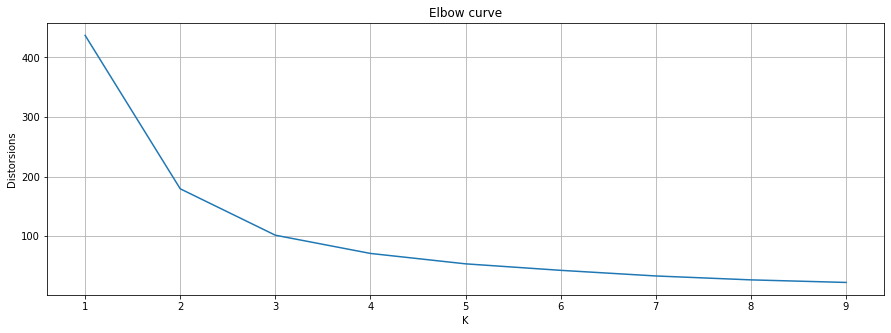

In [ ]:
distorsions = []    # distorsions= wcss 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    distorsions.append(kmeans.inertia_) # kmeans.inertia gives wcss vaue that is distance

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

# Kmeans Cluster.

In [ ]:
Kmeans_model_office = KMeans(n_clusters=3)
Kmeans_model_office.fit(X1)

KMeans(n_clusters=3)

In [ ]:
labels_office = Kmeans_model_office.labels_
labels_office

array([1, 1, 1, ..., 1, 1, 2], dtype=int32)

In [ ]:
scaled_Amazon_review_data_office_products1['cluster']=labels_office
scaled_Amazon_review_data_office_products1

,title,price,Demand,overall,Sales,price_encode,Demand_encode,overall__encode,Sales__encode,cluster
0,#000 4x8&quot; KRAFT BUBBLE MAILER PADDED ENV...,10.740,82,4.768293,880.68,0.010730,0.017964,0.942073,0.008876,1
1,0116 &#39;Give a Man a Fish&#39; - Funny Fath...,4.250,14,4.714286,59.50,0.004240,0.002883,0.928571,0.000599,1
2,0765Z &#39;Virgins In Heaven Birthday&#39; - ...,4.950,11,4.545455,54.45,0.004940,0.002218,0.886364,0.000548,1
3,1 X Auto ceramic black letter opener (japan i...,6.790,19,4.789474,129.01,0.006780,0.003992,0.947368,0.001300,1
4,1 X Midori Traveler&#39;s Notebook Repair Kit,17.080,6,4.666667,102.48,0.017070,0.001109,0.916667,0.001032,1
...,...,...,...,...,...,...,...,...,...,...
27728,zitriom Premium Office Chair Caster Wheel Univ...,10.990,13,5.000000,142.87,0.010980,0.002661,1.000000,0.001439,1
27729,zonoz FS-Four Digital Film &amp; Slide Scanner...,149.990,6,4.000000,899.94,0.149983,0.001109,0.750000,0.009070,2
27730,zoomyo 13&quot; Hot &amp; Cold Laminator Kit Z...,10.245,8,4.875000,81.96,0.010235,0.001552,0.968750,0.000826,1
27731,zoomyo Laminating Sheets | Letter Size 8.9 x 1...,19.500,5,4.800000,97.50,0.019490,0.000887,0.950000,0.000982,1


In [ ]:
scaled_Amazon_review_data_office_products1.sort_values('Sales',ascending=False)

,title,price,Demand,overall,Sales,price_encode,Demand_encode,overall__encode,Sales__encode,cluster
20014,"Prismacolor 3598T Premier Colored Pencils, Sof...",22.00000,4510,4.703326,99220.000000,0.021990,1.000000,0.925831,1.000000e+00,1
26401,Waterman Charleston Black GT Fine Point Founta...,184.00000,502,4.788845,92368.000000,0.183994,0.111111,0.947211,9.309413e-01,1
5652,Brother MFCL2700DW All-In One Laser Printer wi...,223.99000,333,4.363363,74588.670000,0.223984,0.073631,0.840841,7.517502e-01,2
12027,HP OfficeJet Pro 8610 Wireless All-in-One Phot...,211.07152,332,4.132530,70075.744701,0.211066,0.073409,0.783133,7.062662e-01,2
21041,"Rolodex Mesh Collection Jumbo Pencil Cup, Blac...",51.05000,1332,4.657658,67998.600000,0.051041,0.295187,0.914414,6.853314e-01,1
...,...,...,...,...,...,...,...,...,...,...
26889,"Wrist Calculator,Lookatool Unsex Silicone Mult...",1.98000,2,3.000000,3.960000,0.001970,0.000222,0.500000,3.940740e-05,0
14835,Lexmark #29 factory (OEM) Color Return Program...,0.28000,14,4.357143,3.920000,0.000270,0.002883,0.839286,3.900425e-05,2
21246,"S.P. Richards Company COPY Title Stamp, 1-3/4 ...",0.15000,10,4.700000,1.500000,0.000140,0.001996,0.925000,1.461400e-05,1
7016,Chrome Beaded Neck Chain Key-ID-Badge-Reel Holder,0.01000,6,4.666667,0.060000,0.000000,0.001109,0.916667,1.007862e-07,1


# Cluster Insight


In [ ]:
pivot_table_office=scaled_Amazon_review_data_office_products1.pivot_table(values=['Sales','overall'], index='cluster', aggfunc='mean')

In [ ]:
pivot_table_office

,Sales,overall
cluster,,
0,376.480035,3.265030
1,702.558578,4.742521
2,737.798453,4.194354


In [ ]:
 x=scaled_Amazon_review_data_office_products1.copy()

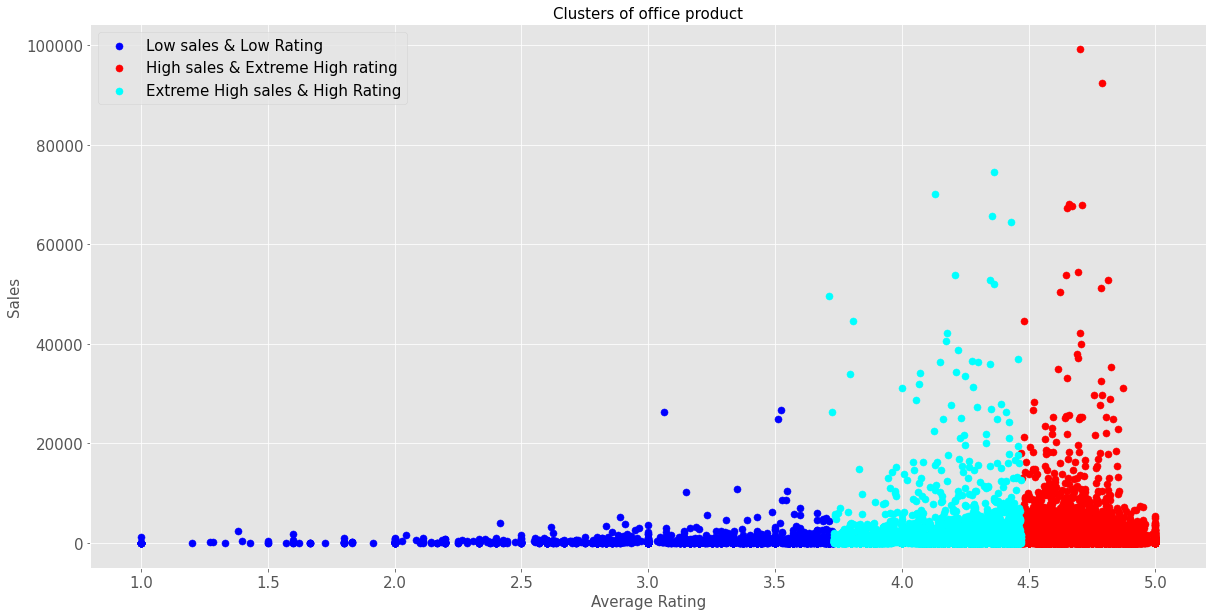

In [ ]:
plt.figure(figsize=(20,10))
style.use('ggplot')
plt.scatter(x.loc[x['cluster'] == 0, 'overall'], x.loc[x['cluster'] == 0,'Sales' ], s = 50, c = 'blue', label ='Low sales & Low Rating' ,)
plt.scatter(x.loc[x['cluster'] == 1, 'overall'], x.loc[x['cluster'] == 1, 'Sales'], s = 50, c = 'red', label = 'High sales & Extreme High rating')
plt.scatter(x.loc[x['cluster']== 2, 'overall'], x.loc[x['cluster'] == 2, 'Sales'], s = 50, c = 'cyan', label = 'Extreme High sales & High Rating') 
plt.gca().xaxis.set_tick_params(labelsize=15)
plt.gca().yaxis.set_tick_params(labelsize=15)
plt.title('Clusters of office product',fontsize=15)
plt.xlabel('Average Rating',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.legend(fontsize=15)
plt.show()

# Low_sales_Low_Rating_office

In [ ]:
Low_sales_Low_Rating_office= scaled_Amazon_review_data_office_products1.loc[scaled_Amazon_review_data_office_products1['cluster']==0]

In [ ]:
path = '/content/drive/MyDrive/Project /office_productLow_sales_&_Low Rating.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  Low_sales_Low_Rating_office.to_csv(f, index=False)

# High_sales_Extreme_High_rating

In [ ]:
High_sales_Extreme_High_rating=scaled_Amazon_review_data_office_products1.loc[scaled_Amazon_review_data_office_products1['cluster']==1]

In [ ]:
path = '/content/drive/MyDrive/Project /office_product_High_sales_Extreme_High_rating.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  High_sales_Extreme_High_rating.to_csv(f, index=False)

# Extreme_High_sales_High_Rating

In [ ]:
Extreme_High_sales_High_Rating=scaled_Amazon_review_data_office_products1.loc[scaled_Amazon_review_data_office_products1['cluster']==2]

In [ ]:
path = '/content/drive/MyDrive/Project /office_product_Extreme_High_sales_High_Rating.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  Extreme_High_sales_High_Rating.to_csv(f, index=False)

# CD & Vinyl

In [ ]:
Amazon_review_data_cd=Amazon_review_data[Amazon_review_data['category(1)']=='CDs & Vinyl']


In [ ]:
Amazon_review_data_cd

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,title,...,brand,category,Year,Month,category(1),sub_category(1),style_1,style_2,polarity,sentiment_Analysis
911726,5.0,True,2016-04-29,A1H1DL4K669VQ9,0001393774,{'Color:': ' green'},Judith Paladino,love it great seller,Five Stars,Songs for the Shepherd,...,Keith Green,"['CDs & Vinyl', 'Christian']",2016,4,CDs & Vinyl,Christian,Color,green,0.650000,Positive
911727,5.0,True,2016-02-23,A3V5XBBT7OZG5G,0001393774,{'Color:': ' green'},gflady,one of my very favourite albums from one of my...,One of my very favourite albums from one of my...,Songs for the Shepherd,...,Keith Green,"['CDs & Vinyl', 'Christian']",2016,2,CDs & Vinyl,Christian,Color,green,0.325000,Positive
911728,5.0,True,2016-02-11,A3SNL7UJY7GWBI,0001393774,{'Color:': ' green'},Lady Leatherneck,thank you jesus lord god that brother greens m...,Five Stars,Songs for the Shepherd,...,Keith Green,"['CDs & Vinyl', 'Christian']",2016,2,CDs & Vinyl,Christian,Color,green,0.000000,Neutral
911729,5.0,True,2015-11-28,A3478QRKQDOPQ2,0001393774,{'Color:': ' green'},jacki,i recall loving his other albums and maybe thi...,forgot but I figured on some of these artists ...,Songs for the Shepherd,...,Keith Green,"['CDs & Vinyl', 'Christian']",2015,11,CDs & Vinyl,Christian,Color,green,0.230455,Positive
911730,5.0,True,2014-12-16,A23M5VTSN2C3H1,0001393774,{'Color:': ' green'},Caliope,keith green was a pioneer in the field of chri...,and I have loved every album he did,Songs for the Shepherd,...,Keith Green,"['CDs & Vinyl', 'Christian']",2014,12,CDs & Vinyl,Christian,Color,green,0.075000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475078,5.0,True,2017-08-17,A1U3N8OJYYZYNB,B01HGGA2BW,{'Format:': ' Audio CD'},Elena A,good,Five Stars,Leontyne Price - Prima Donna Assoluta - Her Ul...,...,Leontyne Price,"['CDs & Vinyl', 'Classical']",2017,8,CDs & Vinyl,Classical,Format,Audio CD,0.700000,Positive
2475079,5.0,True,2017-04-27,A2A2QGGPSG2DLJ,B01HGGA2BW,{'Format:': ' Audio CD'},C. Scott Harrison,its leontyne price enough said,Price!,Leontyne Price - Prima Donna Assoluta - Her Ul...,...,Leontyne Price,"['CDs & Vinyl', 'Classical']",2017,4,CDs & Vinyl,Classical,Format,Audio CD,0.000000,Neutral
2475080,4.0,True,2017-04-03,A8GV20LZ4TC19,B01HGGA2BW,{'Format:': ' Audio CD'},champ,used to have most on l p happy to update,happy to,Leontyne Price - Prima Donna Assoluta - Her Ul...,...,Leontyne Price,"['CDs & Vinyl', 'Classical']",2017,4,CDs & Vinyl,Classical,Format,Audio CD,0.650000,Positive
2475081,5.0,True,2016-11-18,A1S5D0XYGNOB5X,B01HGGA2BW,{'Format:': ' Audio CD'},Arthur Wilson,wonderful reissue of leontyne prices opera rec...,Five Stars,Leontyne Price - Prima Donna Assoluta - Her Ul...,...,Leontyne Price,"['CDs & Vinyl', 'Classical']",2016,11,CDs & Vinyl,Classical,Format,Audio CD,1.000000,Positive


In [ ]:
Amazon_review_data_cd1 = Amazon_review_data_cd.groupby('title').agg({'price':'mean','title':'count','overall':'mean'}).rename(columns={'title':'Demand'}).reset_index()

In [ ]:
Amazon_review_data_cd1

,title,price,Demand,overall
0,17,8.651154,6,4.000000
1,B.B. King Live [Blu-ray],19.410000,14,4.857143
2,Blackfoot,8.315000,18,4.555556
3,Celine Dion,20.120000,10,4.800000
4,Chaos In Motion 2007-2008 (2DVD),9.975000,18,3.611111
...,...,...,...,...
58465,unwind - solo piano,13.420000,5,4.800000
58466,up2zero,15.060000,6,4.000000
58467,vince guaraldi and the lost cues from the char...,22.063250,6,4.833333
58468,vs. Edition Remastered,21.880000,17,4.882353


In [ ]:
Amazon_review_data_cd1['Sales']=Amazon_review_data_cd1['Demand']*Amazon_review_data_cd1['price']

In [ ]:
Amazon_review_data_cd1

,title,price,Demand,overall,Sales
0,17,8.651154,6,4.000000,51.906923
1,B.B. King Live [Blu-ray],19.410000,14,4.857143,271.740000
2,Blackfoot,8.315000,18,4.555556,149.670000
3,Celine Dion,20.120000,10,4.800000,201.200000
4,Chaos In Motion 2007-2008 (2DVD),9.975000,18,3.611111,179.550000
...,...,...,...,...,...
58465,unwind - solo piano,13.420000,5,4.800000,67.100000
58466,up2zero,15.060000,6,4.000000,90.360000
58467,vince guaraldi and the lost cues from the char...,22.063250,6,4.833333,132.379500
58468,vs. Edition Remastered,21.880000,17,4.882353,371.960000


In [ ]:
Amazon_review_data_cd1.dtypes

title       object
price      float64
Demand       int64
overall    float64
Sales      float64
dtype: object

# Scaling 
Since the difference between different columns is high we scaling data so that it can be normalized.

In [ ]:
def feature_scale1(scale):
    Numerics=['float64','int64']
    new_Amazon_review_data_cd1=Amazon_review_data_cd1.select_dtypes(include=Numerics)
    if scale == 'minmax':
        scaler=MinMaxScaler()
    else:
        scaler=StandardScaler()
    Amazon_review_data_cd1_scaled= pd.DataFrame(scaler.fit_transform(new_Amazon_review_data_cd1.to_numpy()),columns=new_Amazon_review_data_cd1.columns)
    return Amazon_review_data_cd1_scaled
    

In [ ]:
scale='minmax'
scaled_Amazon_review_data_cd1=feature_scale1(scale)
scaled_Amazon_review_data_cd1

,price,Demand,overall,Sales
0,0.009177,0.000067,0.750000,0.000058
1,0.020603,0.000174,0.964286,0.000303
2,0.008820,0.000227,0.888889,0.000167
3,0.021357,0.000120,0.950000,0.000224
4,0.010583,0.000227,0.652778,0.000200
...,...,...,...,...
58465,0.014242,0.000053,0.950000,0.000075
58466,0.015983,0.000067,0.750000,0.000101
58467,0.023421,0.000067,0.958333,0.000147
58468,0.023226,0.000214,0.970588,0.000414


In [ ]:
scaled_Amazon_review_data_cd1=scaled_Amazon_review_data_cd1.rename(columns={'overall':'overall__encode','Sales':'Sales__encode','Demand':'Demand_encode','price':'price_encode'})

In [ ]:
scaled_Amazon_review_data_cd1

,price_encode,Demand_encode,overall__encode,Sales__encode
0,0.009177,0.000067,0.750000,0.000058
1,0.020603,0.000174,0.964286,0.000303
2,0.008820,0.000227,0.888889,0.000167
3,0.021357,0.000120,0.950000,0.000224
4,0.010583,0.000227,0.652778,0.000200
...,...,...,...,...
58465,0.014242,0.000053,0.950000,0.000075
58466,0.015983,0.000067,0.750000,0.000101
58467,0.023421,0.000067,0.958333,0.000147
58468,0.023226,0.000214,0.970588,0.000414


In [ ]:
scaled_Amazon_review_data_cd1=pd.concat([Amazon_review_data_cd1,scaled_Amazon_review_data_cd1],axis=1)

# Dropping the row which as parental adivosory


In [ ]:
scaled_Amazon_review_data_cd2=scaled_Amazon_review_data_cd1.drop(58453)

In [ ]:
X2= scaled_Amazon_review_data_cd2[['overall__encode','Sales__encode']].copy()
X2

,overall__encode,Sales__encode
0,0.750000,0.000058
1,0.964286,0.000303
2,0.888889,0.000167
3,0.950000,0.000224
4,0.652778,0.000200
...,...,...
58465,0.950000,0.000075
58466,0.750000,0.000101
58467,0.958333,0.000147
58468,0.970588,0.000414


# Selecting the K Value

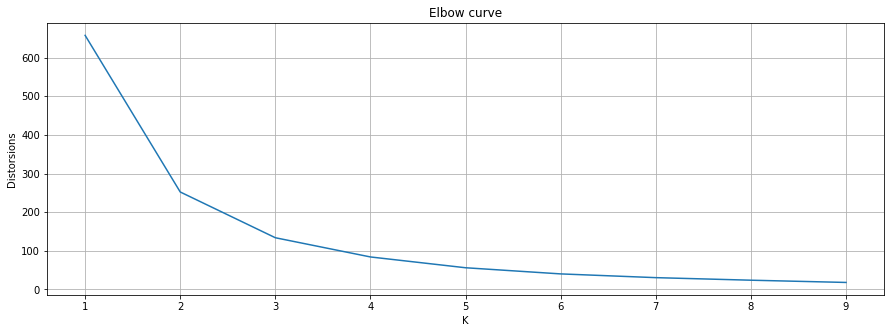

In [ ]:
distorsions = []    # distorsions= wcss 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X2)
    distorsions.append(kmeans.inertia_) # kmeans.inertia gives wcss vaue that is distance

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

# Kmeans Cluster.

In [ ]:
Kmeans_model_cd = KMeans(n_clusters=3)
Kmeans_model_cd.fit(X2)

KMeans(n_clusters=3)

In [ ]:
labels_cd = Kmeans_model_cd.labels_
labels_cd

array([0, 2, 2, ..., 2, 2, 0], dtype=int32)

In [ ]:
scaled_Amazon_review_data_cd2['cluster']=labels_cd
scaled_Amazon_review_data_cd2

,title,price,Demand,overall,Sales,price_encode,Demand_encode,overall__encode,Sales__encode,cluster
0,17,8.651154,6,4.000000,51.906923,0.009177,0.000067,0.750000,0.000058,0
1,B.B. King Live [Blu-ray],19.410000,14,4.857143,271.740000,0.020603,0.000174,0.964286,0.000303,2
2,Blackfoot,8.315000,18,4.555556,149.670000,0.008820,0.000227,0.888889,0.000167,2
3,Celine Dion,20.120000,10,4.800000,201.200000,0.021357,0.000120,0.950000,0.000224,2
4,Chaos In Motion 2007-2008 (2DVD),9.975000,18,3.611111,179.550000,0.010583,0.000227,0.652778,0.000200,1
...,...,...,...,...,...,...,...,...,...,...
58465,unwind - solo piano,13.420000,5,4.800000,67.100000,0.014242,0.000053,0.950000,0.000075,2
58466,up2zero,15.060000,6,4.000000,90.360000,0.015983,0.000067,0.750000,0.000101,0
58467,vince guaraldi and the lost cues from the char...,22.063250,6,4.833333,132.379500,0.023421,0.000067,0.958333,0.000147,2
58468,vs. Edition Remastered,21.880000,17,4.882353,371.960000,0.023226,0.000214,0.970588,0.000414,2


In [ ]:
scaled_Amazon_review_data_cd2.sort_values('Sales',ascending=False)

,title,price,Demand,overall,Sales,price_encode,Demand_encode,overall__encode,Sales__encode,cluster
20081,Greatest Hits,11.214538,7421,4.517181,83223.083001,0.011899,0.099146,0.879295,9.268304e-02,0
54122,Ultimate Collection,18.146549,2723,4.659934,49413.051748,0.019261,0.036371,0.914983,5.502980e-02,2
3876,Appetite For Destruction - Banned Sleeve,44.980000,1058,4.625709,47588.840000,0.047759,0.014124,0.906427,5.299823e-02,2
33553,Nevermind,25.210000,1674,4.130824,42201.540000,0.026763,0.022355,0.782706,4.699856e-02,0
22716,Hybrid Theory,27.926858,1132,3.909894,31613.202907,0.029648,0.015112,0.727473,3.520664e-02,0
...,...,...,...,...,...,...,...,...,...,...
45245,Stones in the Road,0.010000,25,4.960000,0.250000,0.000000,0.000321,0.990000,2.227341e-07,2
22275,Honeysuckle Sweet,0.030000,7,3.714286,0.210000,0.000021,0.000080,0.678571,1.781873e-07,1
25673,Just A Rolling Stone,0.010000,12,3.666667,0.120000,0.000000,0.000147,0.666667,7.795694e-08,1
38213,Put Yourself in My Shoes,0.010000,9,4.666667,0.090000,0.000000,0.000107,0.916667,4.454682e-08,2


# Cluster Insight


In [ ]:
pivot_table_cd=scaled_Amazon_review_data_cd2.pivot_table(values=['Sales','overall'], index='cluster', aggfunc='mean')

In [ ]:
pivot_table_cd

,Sales,overall
cluster,,
0,369.678110,4.283144
1,270.094041,3.528704
2,343.399891,4.758306


In [ ]:
 x1=scaled_Amazon_review_data_cd2.copy()

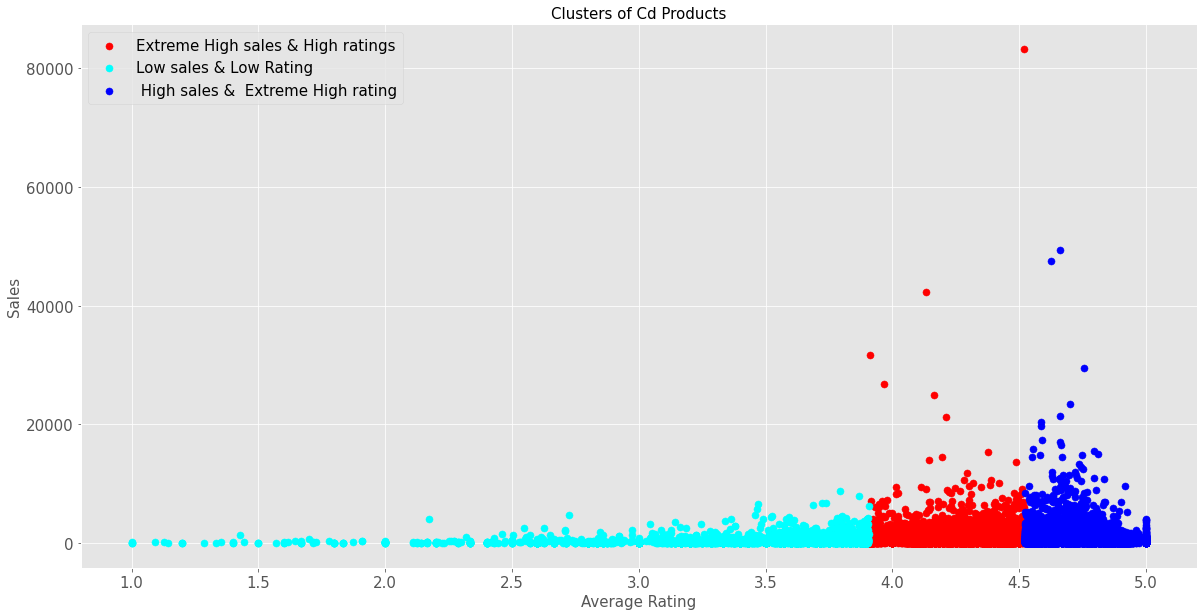

In [ ]:
plt.figure(figsize=(20,10))
style.use('ggplot')
plt.scatter(x1.loc[x1['cluster'] == 0, 'overall'], x1.loc[x1['cluster'] == 0,'Sales' ], s = 50, c = 'red', label = 'Extreme High sales & High ratings')
plt.scatter(x1.loc[x1['cluster']== 1, 'overall'], x1.loc[x1['cluster'] == 1, 'Sales'], s = 50, c = 'cyan', label = 'Low sales & Low Rating')
plt.scatter(x1.loc[x1['cluster'] == 2, 'overall'], x1.loc[x1['cluster'] == 2, 'Sales'], s = 50, c = 'blue', label = ' High sales &  Extreme High rating')

plt.gca().xaxis.set_tick_params(labelsize=15)
plt.gca().yaxis.set_tick_params(labelsize=15)
plt.title('Clusters of Cd Products',fontsize=15)
plt.xlabel('Average Rating',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
scaled_Amazon_review_data_cd2

,title,price,Demand,overall,Sales,price_encode,Demand_encode,overall__encode,Sales__encode,cluster
0,17,8.651154,6,4.000000,51.906923,0.009177,0.000067,0.750000,0.000058,0
1,B.B. King Live [Blu-ray],19.410000,14,4.857143,271.740000,0.020603,0.000174,0.964286,0.000303,1
2,Blackfoot,8.315000,18,4.555556,149.670000,0.008820,0.000227,0.888889,0.000167,3
3,Celine Dion,20.120000,10,4.800000,201.200000,0.021357,0.000120,0.950000,0.000224,1
4,Chaos In Motion 2007-2008 (2DVD),9.975000,18,3.611111,179.550000,0.010583,0.000227,0.652778,0.000200,2
...,...,...,...,...,...,...,...,...,...,...
58465,unwind - solo piano,13.420000,5,4.800000,67.100000,0.014242,0.000053,0.950000,0.000075,1
58466,up2zero,15.060000,6,4.000000,90.360000,0.015983,0.000067,0.750000,0.000101,0
58467,vince guaraldi and the lost cues from the char...,22.063250,6,4.833333,132.379500,0.023421,0.000067,0.958333,0.000147,1
58468,vs. Edition Remastered,21.880000,17,4.882353,371.960000,0.023226,0.000214,0.970588,0.000414,1


# Extreme_High_sales_High_rating_cd

In [ ]:
Extreme_High_sales_High_rating_cd= scaled_Amazon_review_data_cd2.loc[scaled_Amazon_review_data_cd2['cluster']==0]

In [ ]:
path = '/content/drive/MyDrive/Project /cd_Extreme_High_sales_High_rating.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  Extreme_High_sales_High_rating_cd.to_csv(f, index=False)

# low_sales_low_rating

In [ ]:
low_sales_low_rating_cd=scaled_Amazon_review_data_cd2.loc[scaled_Amazon_review_data_cd2['cluster']==1]

In [ ]:
path = '/content/drive/MyDrive/Project /cd_low_sales_low_rating.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  low_sales_low_rating_cd.to_csv(f, index=False)

# High_sales_Extreme_High_Rating

In [ ]:
High_sales_Extreme_High_Rating_cd=scaled_Amazon_review_data_cd2.loc[scaled_Amazon_review_data_cd2['cluster']==3]

In [ ]:
path = '/content/drive/MyDrive/Project /cd_High_sales_Extreme_High_Rating.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  High_sales_Extreme_High_Rating_cd.to_csv(f, index=False)